# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.105914e+01     7.384380e+00
 * time: 0.004151105880737305
     1     2.959777e+01     5.842905e+00
 * time: 0.012022972106933594
     2     2.501828e+01     6.758132e+00
 * time: 0.03118896484375
     3     1.595039e+01     3.473276e+00
 * time: 0.05398297309875488
     4     1.275482e+01     1.392545e+00
 * time: 0.07305502891540527
     5     1.140099e+01     9.691138e-01
 * time: 0.09203195571899414
     6     1.060043e+01     1.804676e+00
 * time: 0.10758113861083984
     7     9.902594e+00     7.315805e-01
 * time: 0.12329506874084473
     8     9.652365e+00     6.005224e-01
 * time: 0.13898015022277832
     9     9.439459e+00     5.769556e-01
 * time: 0.15524601936340332
    10     9.425809e+00     1.142693e+00
 * time: 0.1676640510559082
    11     9.340732e+00     9.365361e-01
 * time: 0.18001413345336914
    12     9.225582e+00     5.806235e-01
 * time: 0.23781394958496094
    13     9.123776e+00     4.432038e-01
 * time: 0

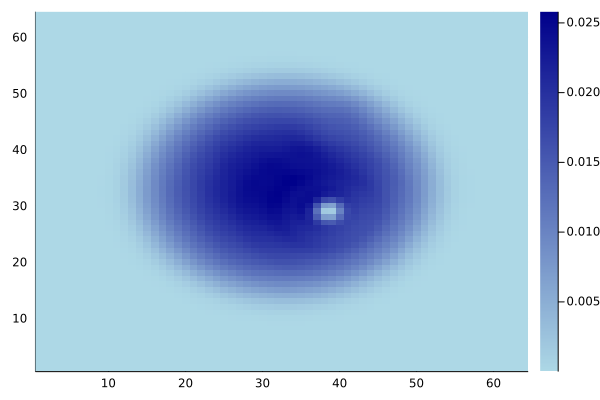

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)